In [41]:
import pydicom
import SimpleITK as sitk

import matplotlib.pyplot as plt
import numpy as np

In [45]:
dicom_path = 'dicom_dir/ID_0016_AGE_0063_CONTRAST_1_CT.dcm'

ds = pydicom.dcmread(dicom_path)

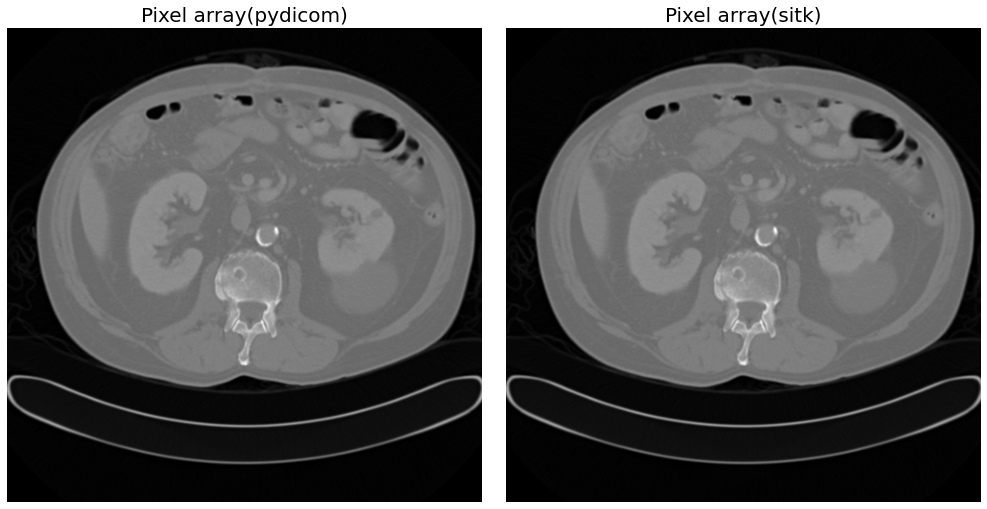

In [46]:
# 1. pydicom 이용
ds = pydicom.read_file(dicom_path)
s = ds.RescaleSlope
b = ds.RescaleIntercept
image1 = s * ds.pixel_array + b

# 2. SimpleITK 이용
image2 = sitk.GetArrayFromImage(sitk.ReadImage(dicom_path)).squeeze()

# 그림으로 표현
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Pixel array(pydicom)', fontsize=20)
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Pixel array(sitk)', fontsize=20)
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [48]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

def get_array(dicom_path : str) -> np.array : 
    return sitk.GetArrayFromImage(sitk.ReadImage(dicom_path)).squeeze()


def windowing(image: np.array, window_center: int, window_width: int) -> np.array : 
    lower = window_center - window_width/2
    upper = window_center + window_width/2
    
    image = ((np.clip(image, lower, upper) - lower) / window_width) * 255
    return np.array(image, dtype = np.uint8)

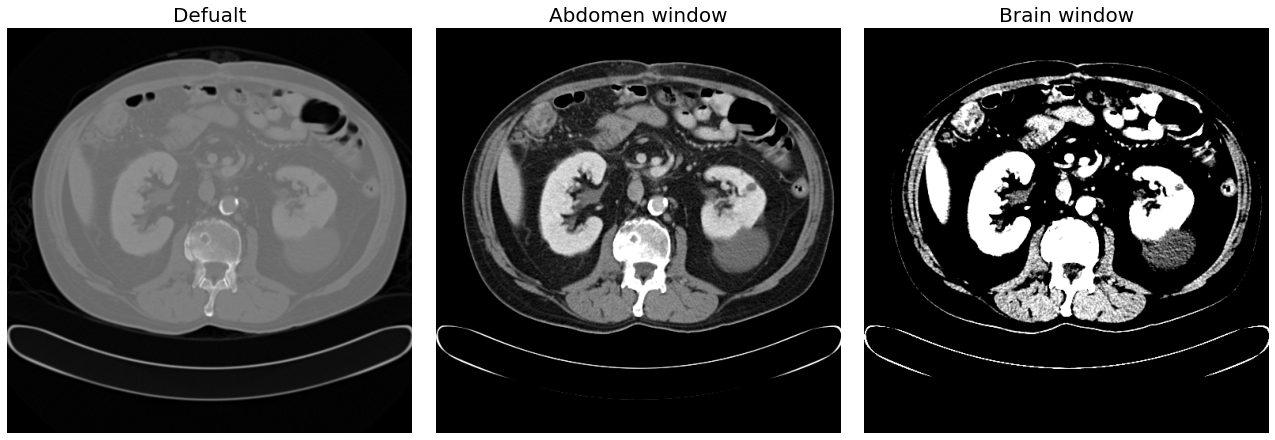

In [50]:
abdomen_wc, abdomen_ww = 60, 400
brain_wc, brain_ww = 40, 80

original_img = get_array(dicom_path)
abdomen = windowing(original_img, abdomen_wc, abdomen_ww)
brain = windowing(original_img, brain_wc, brain_ww)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Defualt', fontsize=20)
plt.imshow(original_img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Abdomen window', fontsize=20)
plt.imshow(abdomen, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Brain window', fontsize=20)
plt.imshow(brain, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()